# Parkinson's Disease Prediction

Parkinson's disease is a progressive nervous system disorder that affects movement. This project involves the use of machine learning and deep learning to build a model using which we can accurately detect presence of Parkinson's disease in one's body.First, we import the necessary libraries that we will use throughout this project.

In [66]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


We read the dataset.Then use the function *parkinson.head()* to get a view of the dataset before we work on it. 

In [67]:
parkinson=pd.read_csv("C:/Users/TRACY WHITNEY/Desktop/kaggle datasets/Parkinsons Disease Classification/pd_speech_features.csv")

In [68]:
parkinson.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


To obtain the *features* and *labels* from the dataset.We have to understand that are inclusive of all the columns except **class** and **gender**, while the labels only have the **class** columns. 

In [69]:
features=parkinson.loc[:,parkinson.columns!=('class','gender')]
labels=parkinson.loc[:,'class'].values

The class column has either 0 and 1.We shall obtain the counts of these labels

In [70]:
print(labels[labels==1].shape[0],labels[labels==0].shape[0])

564 192


We have 564 ones and 192 zeros in the class column

Next we initialize a **StandardScaler**. The StandardScaler standardizes the feature by subtracting the mean and then scaling the unit variance. The function method fits the values then scales them 

In [71]:
x=features
y=labels
preprocessor=make_column_transformer((StandardScaler(),list(x.columns)))

Now ,split the dataset into training and testing, using 20% of the data for testing

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=7)

## Machine Learning

### XGBoost

We will build a model using a XGBClassifier and train our model. The XGBoost is a machine learning algorithm is based on the decision trees model. The eXtreme Gradient Boosting falls under the Ensemble Learning. and basically uses **gradient boosting algorithms**. The advantage of XGBClassifier is that we get to train and predict using many models to produce a single superior output. The objective of the model is to accurately detect the presence of Parkinson's disease in an individual

In [73]:
import warnings
warnings.filterwarnings('ignore')
mdl=XGBClassifier()
mdl.fit(x_train,y_train)

[23:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Finally generating the predicted values of the x_test(y_pred) and calculating the accuracy score

In [74]:
y_pred=mdl.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

100.0


The accuracy score using the XGBClassifier is 100%. However ,there are concerns of getting a 100% accuracy on your model. There are claims that a 100% accuracy score is probably a case of **overfitting** (using part of training data for testing), however there are other claims that a 100% accuracy score depicts a deciptively excellently model.So we decided to try out other machine learning models such as *Logistic Regression,KNN,SVM and Random Forest* to find their accuracy scores.

### Other machine learning algorithms

In [75]:
#import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [76]:
classifiers=['Logistic Regression','KNN','SVC','Random Forest Classifier']
pred_value=[LogisticRegression(),KNeighborsClassifier(),SVC(),RandomForestClassifier()]
models=dict(zip(classifiers,pred_value))
print(models)

{'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'SVC': SVC(), 'Random Forest Classifier': RandomForestClassifier()}


In [77]:
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    accuracy=accuracy_score(y_test,predict)*100
    print(name,accuracy)

Logistic Regression 73.68421052631578
KNN 73.02631578947368
SVC 75.0
Random Forest Classifier 93.42105263157895


The Logistic Regression, K-Nearest Neighbors, SVC accuracy scores indicate that we have a good model. While the Randiom Forest Classifier's accuracy score 93% means that it we have an excellent model.

## Deep Learning

Deep learning is a subset of machine learning that focuses on neural networks and algorithms for training neural networks.We will use *keras and tensorflow* methods to perform logistic regression.We are going to use **keras** to define our network architecture.
Next, the Keras-based model contains three Dense layers, where the first four specify the relu activation function and the fifth layer specifies the sigmoid activation function.

In [78]:
model=tf.keras.models.Sequential([
          layers.Dense(70,activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.1),
          layers.Dense(70,activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.1),
          layers.Dense(40,activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.1),
          layers.Dense(30,activation='relu'),
          layers.BatchNormalization(),
          layers.Dropout(0.1),
          layers.Dense(1,activation='sigmoid')
        ])

The next code snippet compiles the model with an adam optimizer, the MSE loss function, and also specifies the accuracy and MAE for the metrics. Then scatter plots of test values and predictions


Epoch 1/10
61/61 [==============================] - 2s 4ms/step - loss: 0.2529 - accuracy: 0.6175 - mae: 0.4375
Epoch 2/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.6970 - mae: 0.3964
Epoch 3/10
61/61 [==============================] - 0s 4ms/step - loss: 0.2055 - accuracy: 0.7334 - mae: 0.3833
Epoch 4/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1915 - accuracy: 0.7334 - mae: 0.3743
Epoch 5/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.7268 - mae: 0.3702
Epoch 6/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1879 - accuracy: 0.7483 - mae: 0.3642
Epoch 7/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 0.7334 - mae: 0.3570
Epoch 8/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.7384 - mae: 0.3585
Epoch 9/10
61/61 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.7434 - mae:

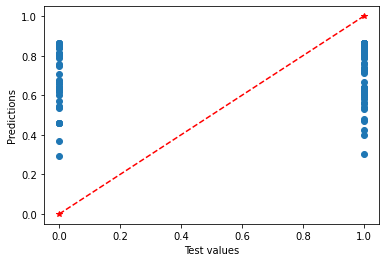

In [79]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy','mae'])
model.fit(x_train, y_train, batch_size=10,epochs=10)

# Predicting values from the test set
y_pred = model.predict(x_test)

# scatter plot of test values vs predictions
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r*--')
ax.set_xlabel('Test values')
ax.set_ylabel('Predictions')
plt.show()